# Importing Basic Package

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [5]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [7]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [9]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


## checking for null value

In [12]:
customers.isnull().sum()
products.isnull().sum()
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

## merging the dataset

In [17]:
data = transactions.merge(customers, on='CustomerID', how='left')
data = data.merge(products, on='ProductID', how='left')

In [19]:
data['SignupDate'] = pd.to_datetime(data['SignupDate'])
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 101.7+ KB


In [23]:
data.describe()

,TransactionDate,Quantity,TotalValue,Price_x,SignupDate,Price_y
count,1000,1000.000000,1000.000000,1000.00000,1000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,2023-07-09 02:49:55.199999744,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000,2022-01-22 00:00:00,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,2022-09-17 12:00:00,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,2023-07-23 00:00:00,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,2024-04-12 00:00:00,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,2024-12-28 00:00:00,497.76000
std,NaN,1.117981,493.144478,140.73639,NaN,140.73639


## Data Augmentation technique

In [26]:
data['TransactionYear'] = data['TransactionDate'].dt.year
data['TransactionMonth'] = data['TransactionDate'].dt.month
data['TransactionDay'] = data['TransactionDate'].dt.day
data['TransactionWeekday'] = data['TransactionDate'].dt.weekday  

data['SignupYear'] = data['SignupDate'].dt.year
data['SignupMonth'] = data['SignupDate'].dt.month

data['DaysSinceSignup'] = (data['TransactionDate'] - data['SignupDate']).dt.days

data.to_csv("Augmented_Transactions.csv", index=False)
print("Augmented dataset saved as 'Augmented_Transactions.csv'")


Augmented dataset saved as 'Augmented_Transactions.csv'


In [28]:
data = pd.read_csv("Augmented_Transactions.csv")
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y,TransactionYear,TransactionMonth,TransactionDay,TransactionWeekday,SignupYear,SignupMonth,DaysSinceSignup
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,8,25,6,2022,12,631
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,5,27,0,2024,9,-100
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,4,25,3,2024,4,21
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,3,26,1,2024,4,-16
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,3,21,3,2022,3,737


In [30]:
data.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y', 'TransactionYear',
       'TransactionMonth', 'TransactionDay', 'TransactionWeekday',
       'SignupYear', 'SignupMonth', 'DaysSinceSignup'],
      dtype='object')

In [32]:
data['ProductName'].value_counts()

ProductName
ActiveWear Smartwatch          40
SoundWave Headphones           38
BookWorld Biography            30
ActiveWear Rug                 29
SoundWave Cookbook             29
                               ..
HomeSense Bluetooth Speaker     7
BookWorld Wall Art              7
SoundWave Laptop                7
SoundWave Bluetooth Speaker     7
SoundWave Jacket                5
Name: count, Length: 66, dtype: int64

In [34]:
data['Price_x'].value_counts()

Price_x
303.20    19
433.64    17
374.16    16
417.37    16
57.30     16
          ..
338.66     5
26.26      4
196.40     4
18.82      4
354.29     4
Name: count, Length: 100, dtype: int64

In [38]:
data.rename(columns={'Price_x': 'TransactionPrice', 'Price_y': 'ProductPrice'}, inplace=True)


In [40]:
price_difference = data[data['TransactionPrice'] != data['ProductPrice']]
print(price_difference[['ProductName', 'TransactionPrice', 'ProductPrice']])

Empty DataFrame
Columns: [ProductName, TransactionPrice, ProductPrice]
Index: []


In [42]:
data = data.drop(columns=['ProductPrice'])
data.to_csv("Final_Augmented_Transactions.csv", index=False)


In [44]:
data = pd.read_csv("Final_Augmented_Transactions.csv")
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,TransactionPrice,CustomerName,Region,SignupDate,ProductName,Category,TransactionYear,TransactionMonth,TransactionDay,TransactionWeekday,SignupYear,SignupMonth,DaysSinceSignup
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,2024,8,25,6,2022,12,631
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,2024,5,27,0,2024,9,-100
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,2024,4,25,3,2024,4,21
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,2024,3,26,1,2024,4,-16
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,2024,3,21,3,2022,3,737


In [46]:
data.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'TransactionPrice', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'TransactionYear',
       'TransactionMonth', 'TransactionDay', 'TransactionWeekday',
       'SignupYear', 'SignupMonth', 'DaysSinceSignup'],
      dtype='object')

In [21]:
# data = data.drop('TransactionID', axis=1)
# data = data.drop('CustomerID', axis=1)
# data = data.drop('ProductID', axis=1)
# data = data.drop('TransactionDate', axis=1)
# data = data.drop('CustomerName', axis=1)
# data = data.drop('SignupDate', axis=1)

## Droping unwanted column

In [48]:
def drop_col(data, columns):
    return data.drop(columns, axis=1)

columns_to_drop = ['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate', 'CustomerName', 'SignupDate', 'DaysSinceSignup', 'TransactionDay']
data = drop_col(data, columns_to_drop)

In [52]:
data.head()

,Quantity,TotalValue,TransactionPrice,Region,ProductName,Category,TransactionYear,TransactionMonth,TransactionWeekday,SignupYear,SignupMonth
0,1,300.68,300.68,Europe,ComfortLiving Bluetooth Speaker,Electronics,2024,8,6,2022,12
1,1,300.68,300.68,Asia,ComfortLiving Bluetooth Speaker,Electronics,2024,5,0,2024,9
2,1,300.68,300.68,Europe,ComfortLiving Bluetooth Speaker,Electronics,2024,4,3,2024,4
3,2,601.36,300.68,South America,ComfortLiving Bluetooth Speaker,Electronics,2024,3,1,2024,4
4,3,902.04,300.68,Europe,ComfortLiving Bluetooth Speaker,Electronics,2024,3,3,2022,3


In [54]:
data.describe()

,Quantity,TotalValue,TransactionPrice,TransactionYear,TransactionMonth,TransactionWeekday,SignupYear,SignupMonth
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.537000,689.995560,272.55407,2023.996000,6.288000,2.893000,2023.055000,6.120000
std,1.117981,493.144478,140.73639,0.063151,3.437859,1.983301,0.846576,3.422472
min,1.000000,16.080000,16.08000,2023.000000,1.000000,0.000000,2022.000000,1.000000
25%,2.000000,295.295000,147.95000,2024.000000,3.000000,1.000000,2022.000000,3.000000
50%,3.000000,588.880000,299.93000,2024.000000,6.000000,3.000000,2023.000000,5.000000
75%,4.000000,1011.660000,404.40000,2024.000000,9.000000,5.000000,2024.000000,9.000000
max,4.000000,1991.040000,497.76000,2024.000000,12.000000,6.000000,2024.000000,12.000000


In [56]:
data.columns

Index(['Quantity', 'TotalValue', 'TransactionPrice', 'Region', 'ProductName',
       'Category', 'TransactionYear', 'TransactionMonth', 'TransactionWeekday',
       'SignupYear', 'SignupMonth'],
      dtype='object')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Quantity            1000 non-null   int64  
 1   TotalValue          1000 non-null   float64
 2   TransactionPrice    1000 non-null   float64
 3   Region              1000 non-null   object 
 4   ProductName         1000 non-null   object 
 5   Category            1000 non-null   object 
 6   TransactionYear     1000 non-null   int64  
 7   TransactionMonth    1000 non-null   int64  
 8   TransactionWeekday  1000 non-null   int64  
 9   SignupYear          1000 non-null   int64  
 10  SignupMonth         1000 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 86.1+ KB


## checking for outliers

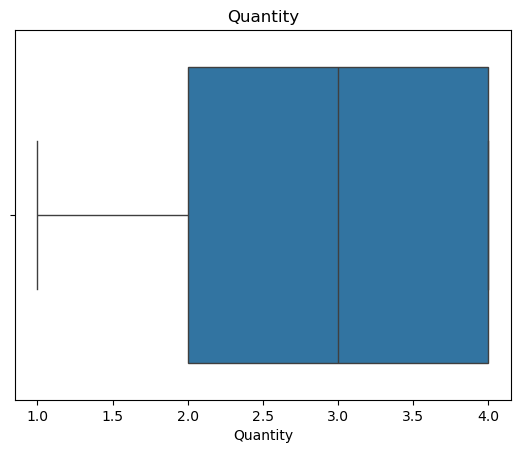

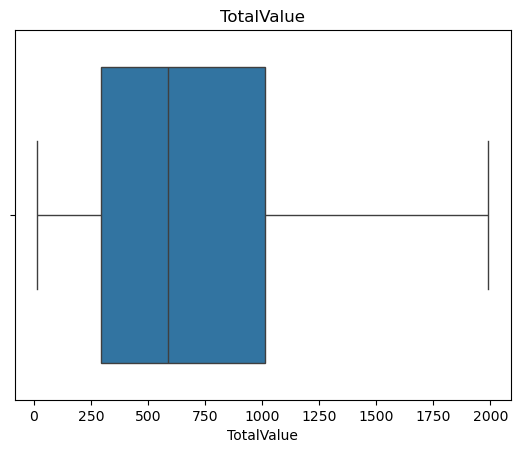

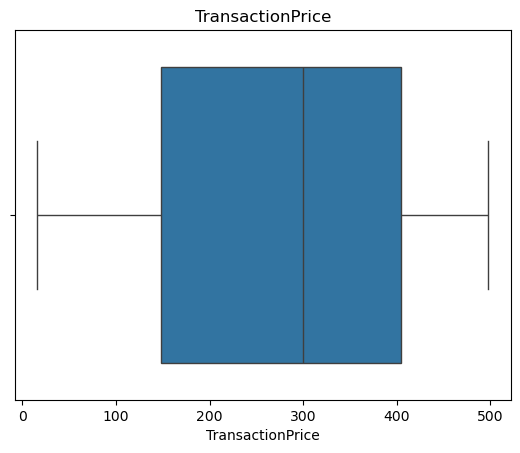

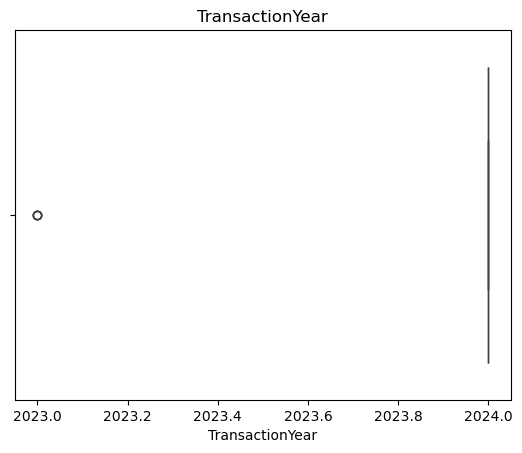

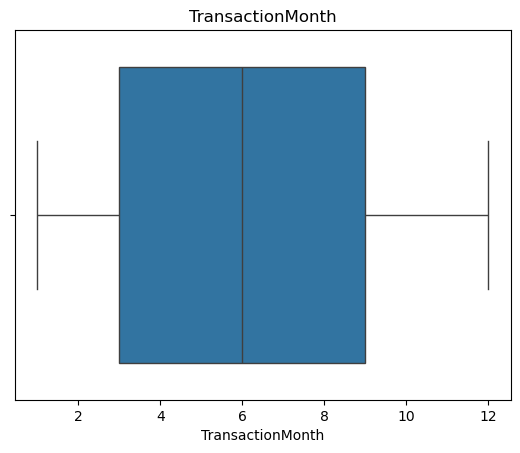

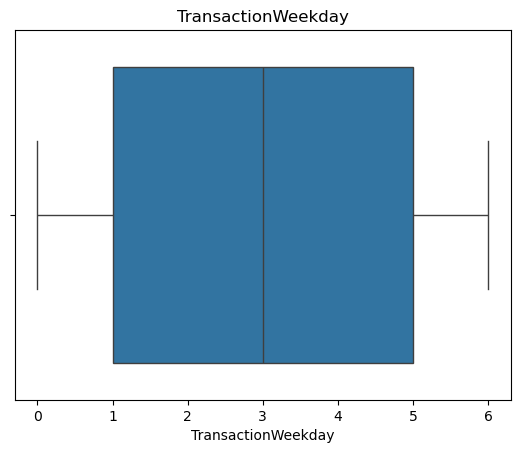

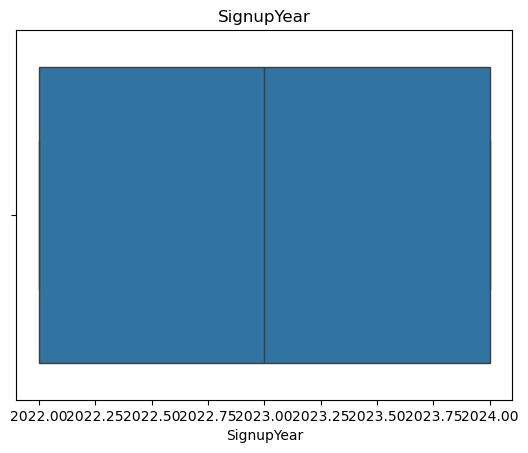

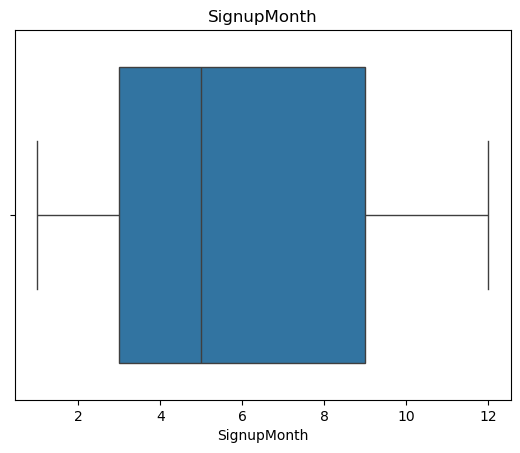

In [61]:
def boxplots(col):
    sns.boxplot(data[col], orient='h')
    plt.title(col)
    plt.show()

for i in list(data.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

# Check for correlation

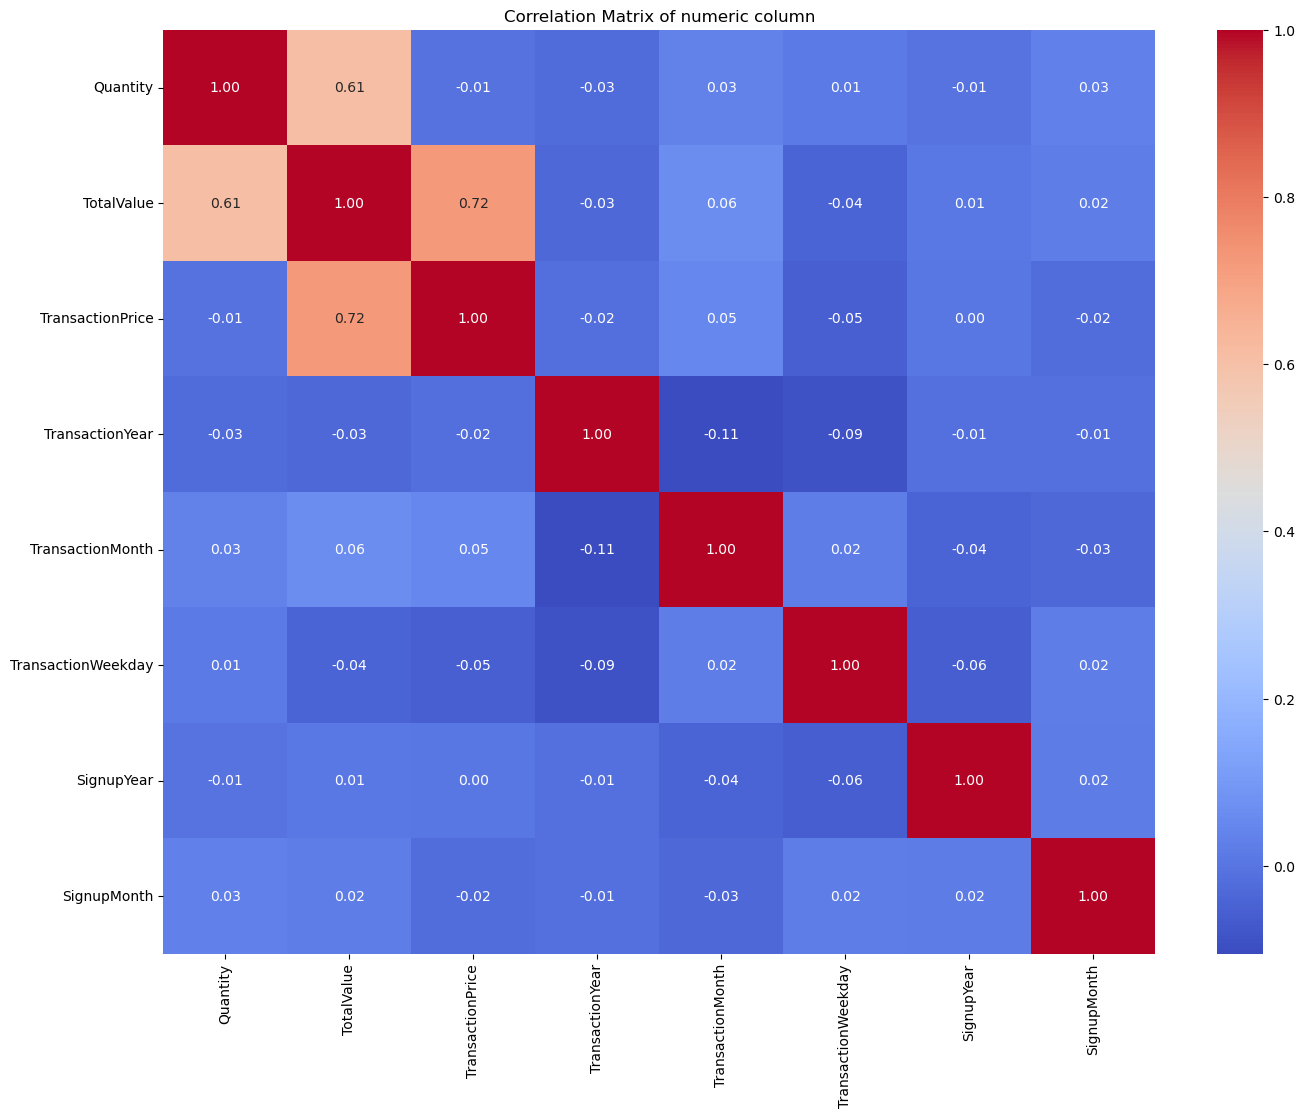

In [63]:
numeric_col = data.select_dtypes(include=['int64','float64'])

corr = numeric_col.corr()

plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix of numeric column")
plt.show()

## Regional sales performance

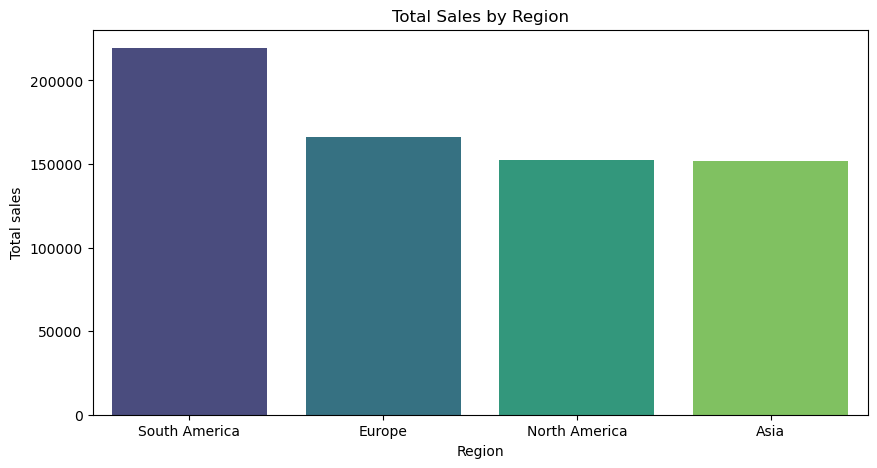

In [66]:
region_counts = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.xlabel('Region')
plt.ylabel("Total sales")
plt.title('Total Sales by Region')
plt.show()

## Top-Selling Product Categories

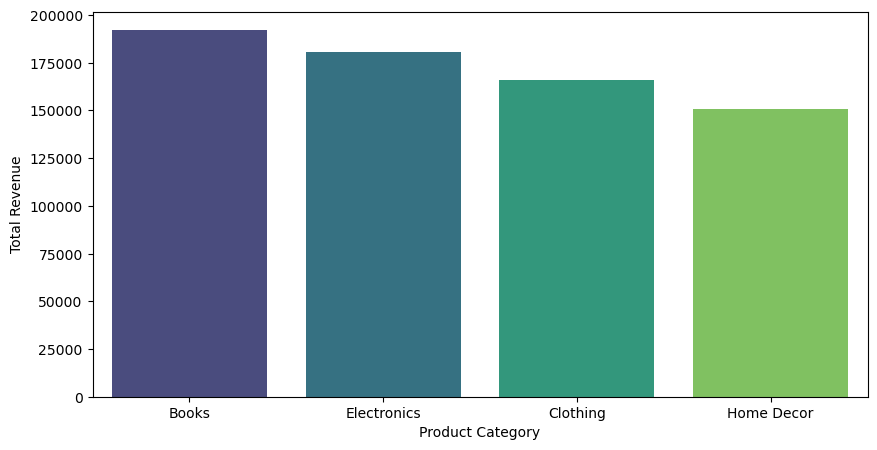

In [68]:
category_revenue = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='viridis')
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.show()

## Most Popular Products

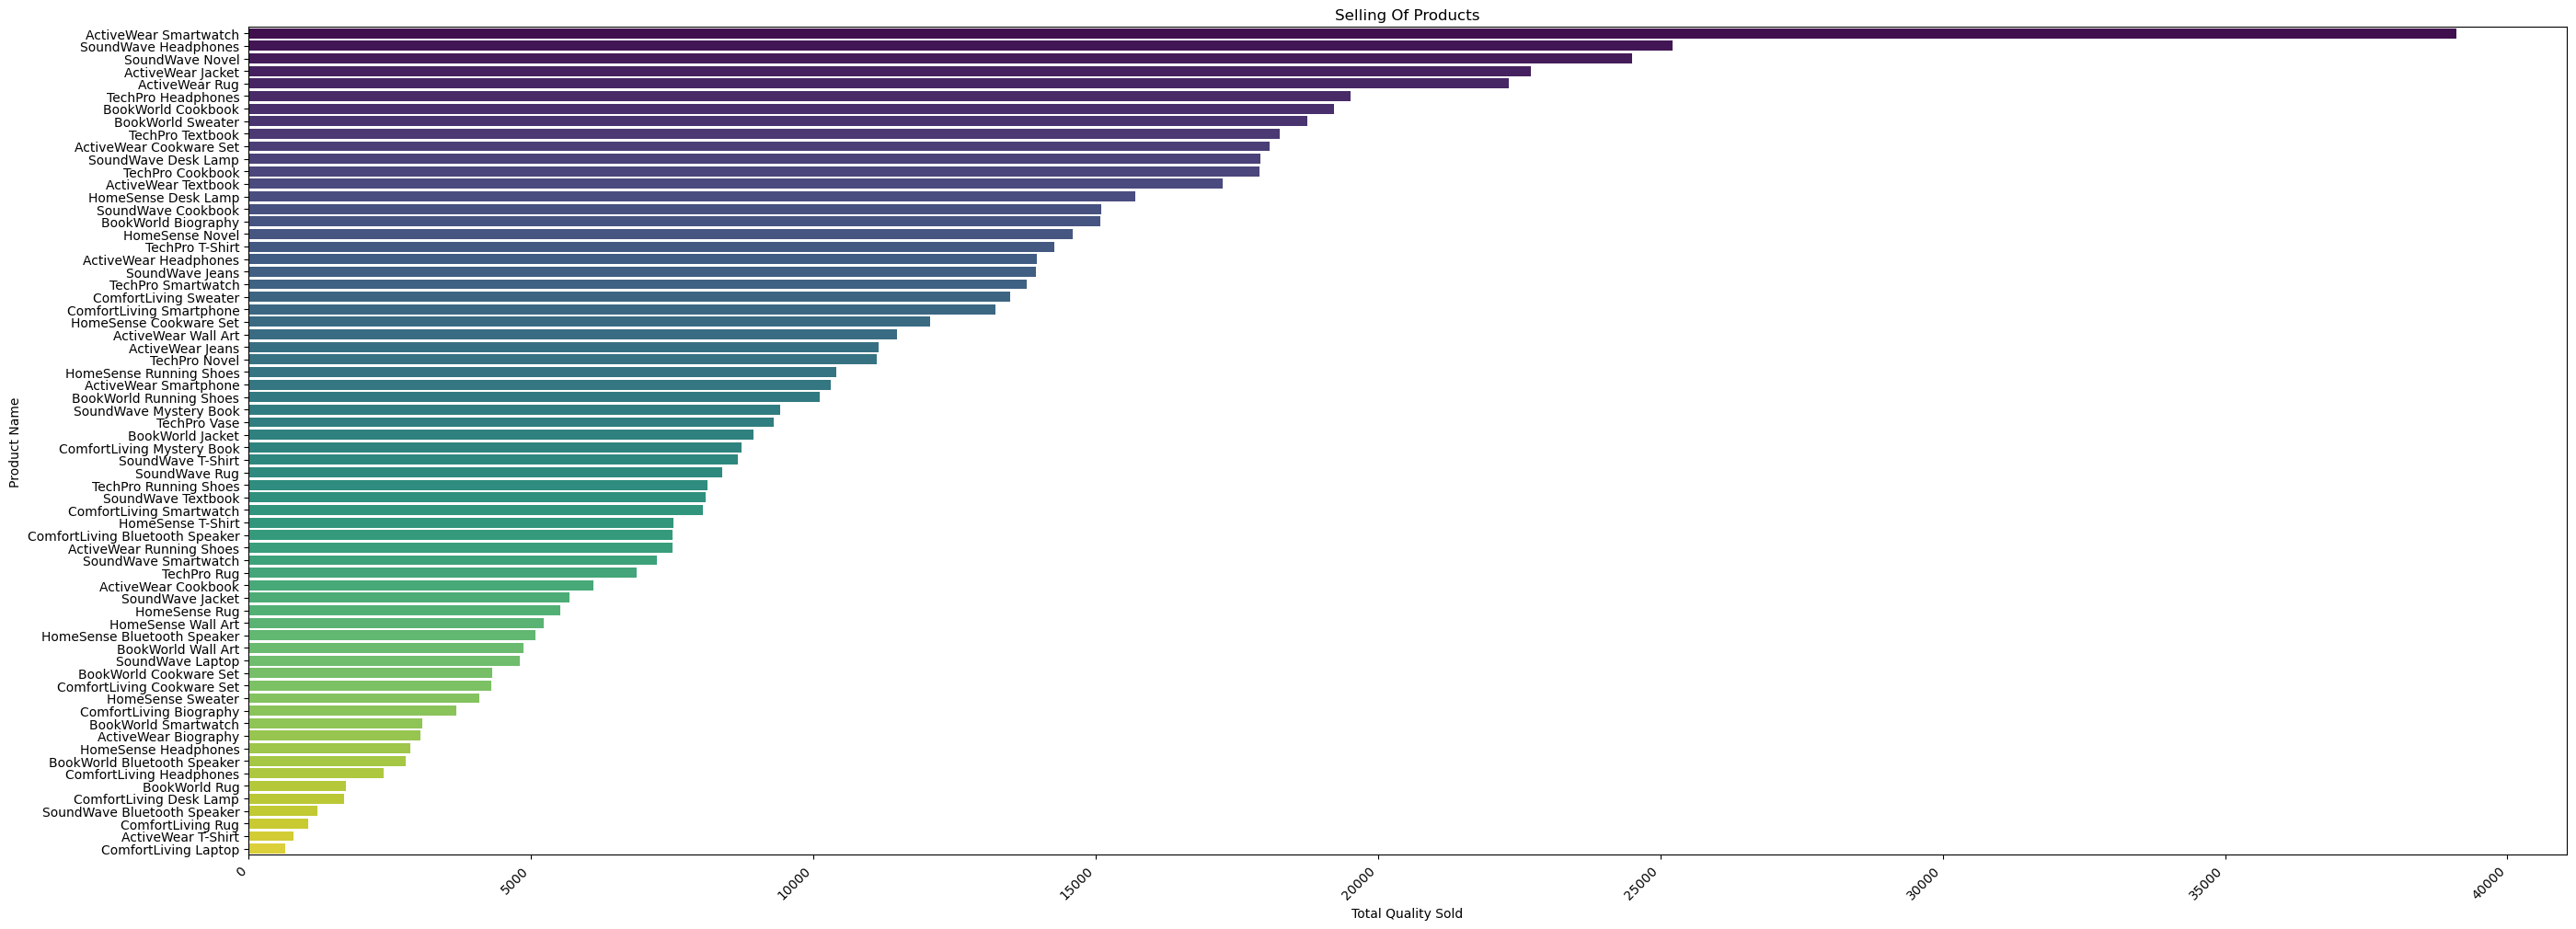

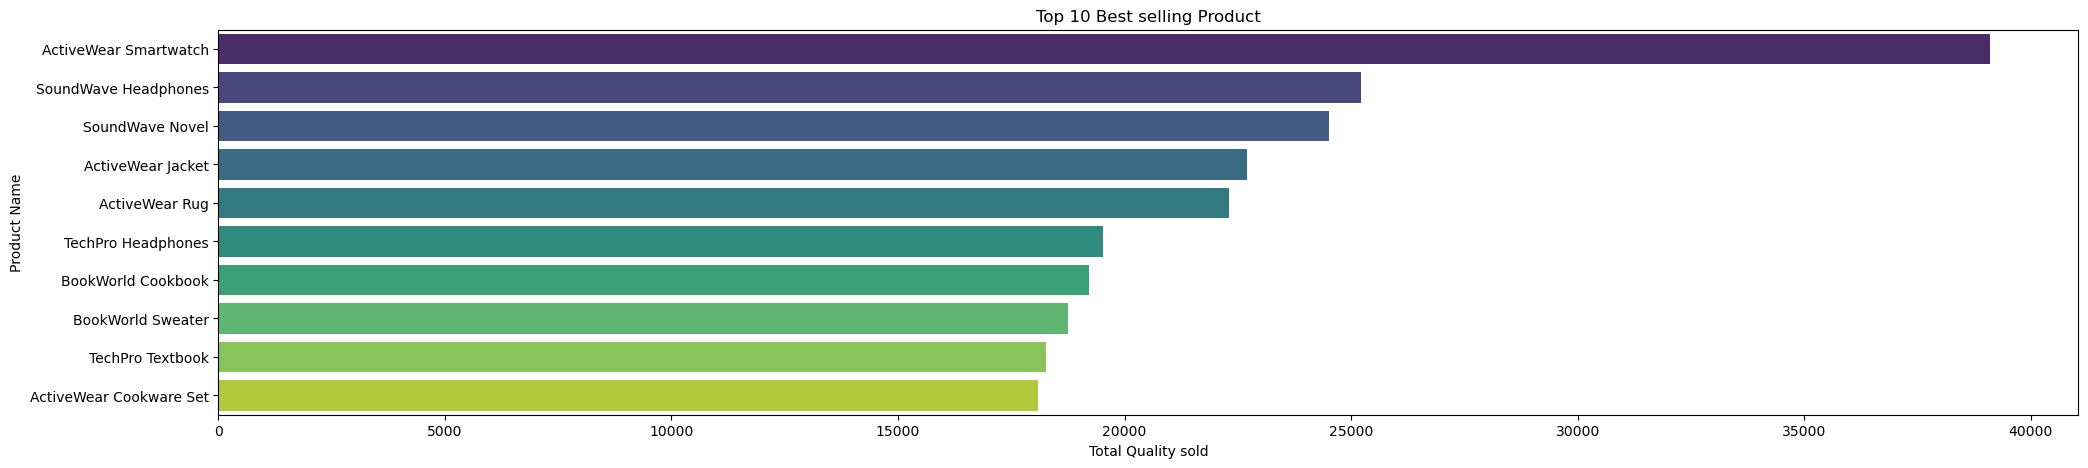

In [70]:
top_product = data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(28, 10))  
sns.barplot(y=top_product.index, x=top_product.values, palette='viridis')
plt.xlabel('Total Quality Sold')
plt.ylabel('Product Name')
plt.title("Selling Of Products")
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.tight_layout()  

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

top_product = data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(24, 5))
sns.barplot(y=top_product.index, x= top_product.values, palette='viridis')
plt.xlabel('Total Quality sold')
plt.ylabel('Product Name')
plt.title("Top 10 Best selling Product")
plt.show()

## Day of Week Transaction Trends

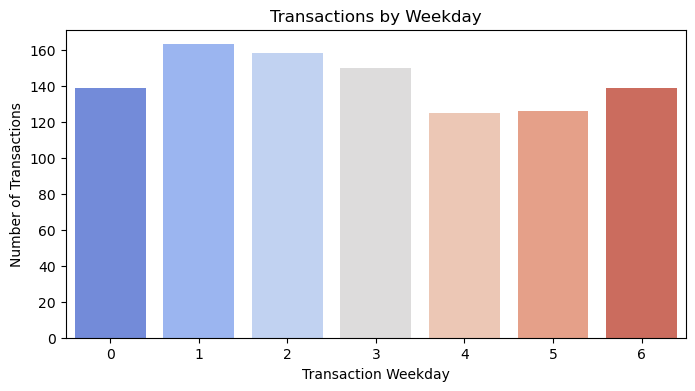

In [72]:
weekday_counts = data['TransactionWeekday'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette='coolwarm')
plt.xlabel("Transaction Weekday")
plt.ylabel("Number of Transactions")
plt.title("Transactions by Weekday")
plt.show()

## Customer Signup Month VS Total Spending 

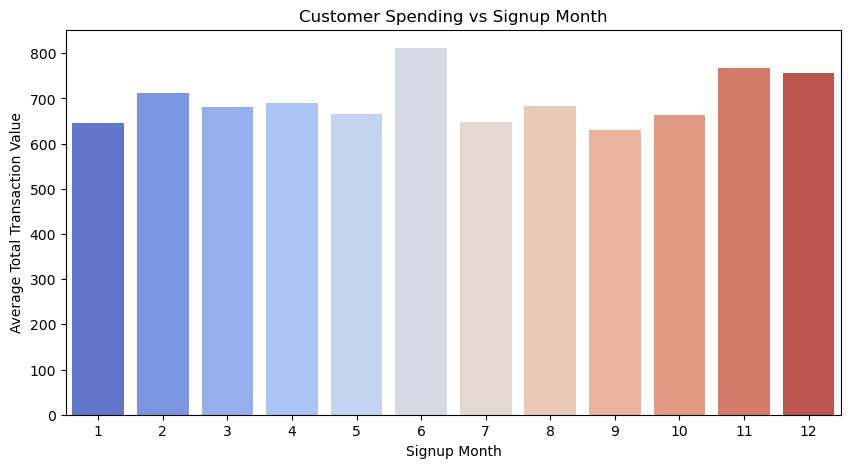

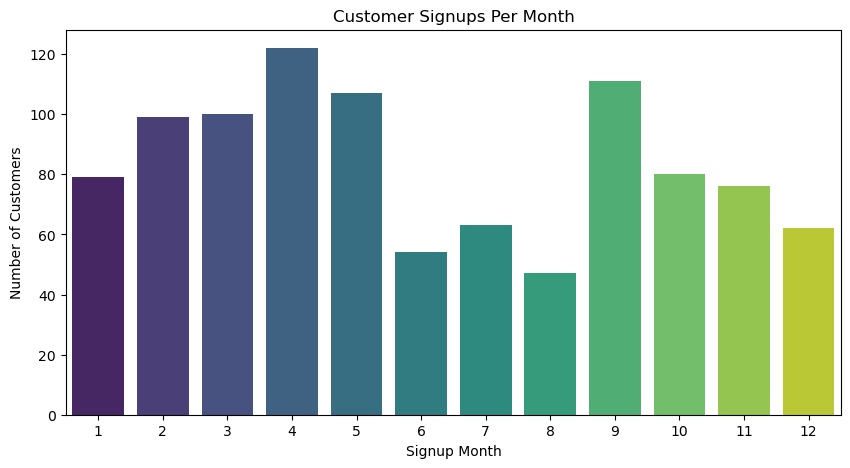

In [86]:
signup_month_spending = data.groupby('SignupMonth')['TotalValue'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='SignupMonth', y='TotalValue', data=signup_month_spending, palette='coolwarm')

plt.xlabel("Signup Month")
plt.ylabel("Average Total Transaction Value")
plt.title("Customer Spending vs Signup Month")
plt.show()

signup_month_counts = data['SignupMonth'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=signup_month_counts.index, y=signup_month_counts.values, palette="viridis")

plt.xlabel("Signup Month")
plt.ylabel("Number of Customers")
plt.title("Customer Signups Per Month")
plt.show()